Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO 5 | **Line and Circle Detection**
**Name** | Quibral, Juliann Vincent
**Section** | CPE32S3
**Date Performed**: | 2/21/2025
**Date Submitted**: | 2/21/2025
**Instructor**: |Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

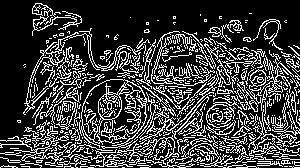

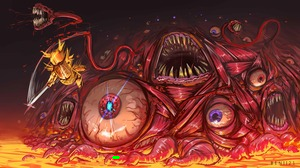

In [3]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/WOF.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

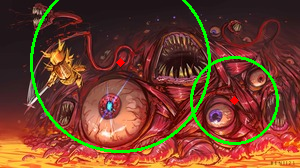

In [4]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/WOF.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("WOF.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

**The code encircled the parts where it see potential round objects**

Change the value to 9, **what happens to the image**?

**The code made a smaller circle focusin on the potential round object**

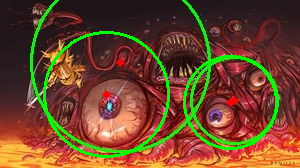

In [5]:
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/WOF.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("WOF.jpg", planets)
cv2_imshow(planets)

Lastly, change the value to 15, **what can you say about the resulting image?**

**The code accurately found the left round object how ever it wasn't able to lock on to the right one.**

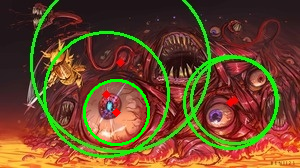

In [6]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/WOF.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("WOF.jpg", planets)
cv2_imshow(planets)

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

**So upon performing the modifications within the code I was able to assume that what I was adjusting earlier is basically the threshold of detecting round objects within an image and not only does it find round objects it also encircles the potentially round ones and depending on the threshold it can spot round objects accurately and and for a few modifications it can also check for oval shaped obejcts.**

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

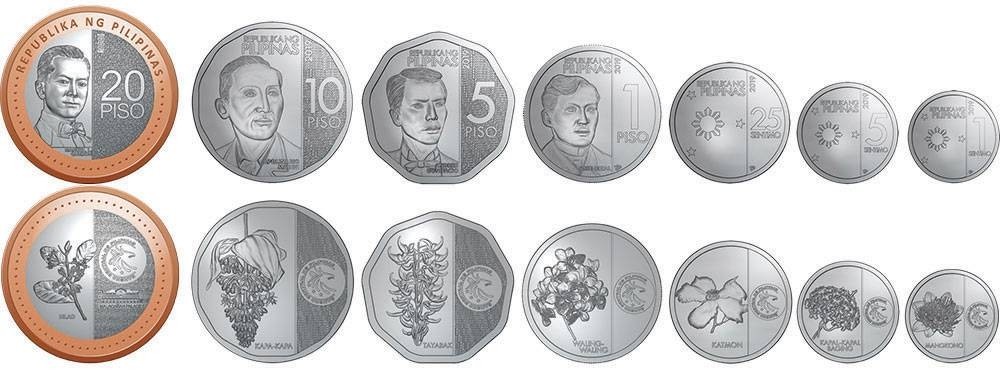

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

Line detected: 562


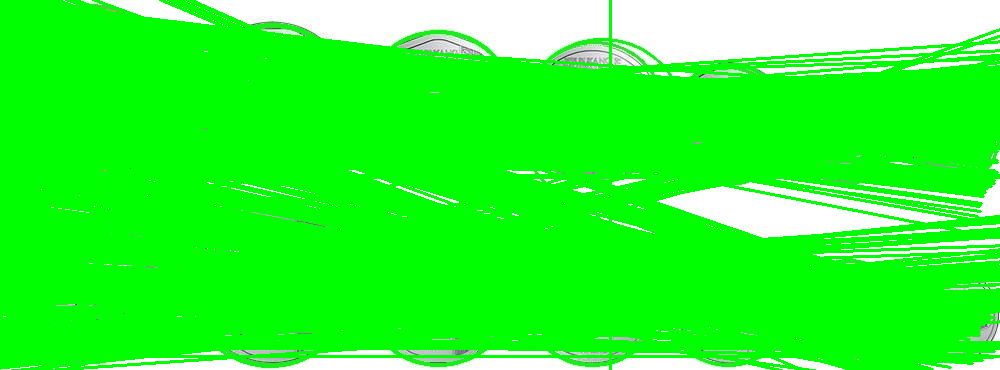

Coin detected: 7


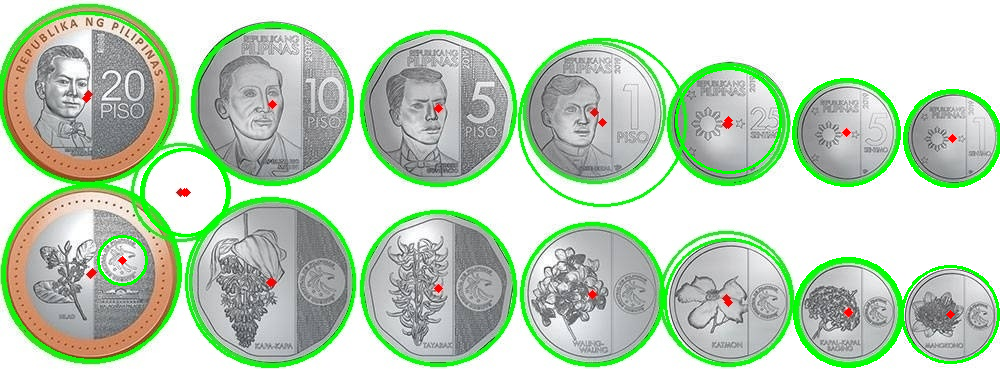

7

In [51]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def lines(path):
    im = cv2.imread(path)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(im, (x1, y1), (x2, y2), (0, 255, 0), 2)
        print(f"Line detected: {len(lines)}")
    else:
        print("No lines")

    cv2_imshow(im)
    return len(lines) if lines is not None else 0

def circles(path):
    im = cv2.imread(path)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, 1, 20,
        param1=100, param2=40, minRadius=20, maxRadius=60
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(im, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(im, (i[0], i[1]), 2, (0, 0, 255), 3)
        print(f"Coin detected: {len(circles[0])}")
    else:
        print("No coin")

    cv2_imshow(im)
    return len(circles[0]) if circles is not None else 0

path = "coin.jpg"
lines(path)
circles(path)

## 5. Summary, Conclusions and Lessons Learned

This activity used both line and circle detection to count coins in an image. The Hough Line Transform was applied to detect edges, while the Hough Circle Transform identified circular objects. Line detection picked up many edges, leading to an inaccurate count, while circle detection effectively identified the coins. Image preprocessing, such as blurring and edge detection, helped improve accuracy. Although the method performed well, overlapping and smaller coins remained challenging. Fine-tuning detection parameters, including minRadius and maxRadius, was crucial in improving the results for better precision.

In coin counting, circle detection outperformed line detection in terms of reliability.  An inflated count resulted from the latter's detection of several non-coin edges.  By varying parameters like radius, param1, and param2, the accuracy of circle identification was greatly improved.  It was still difficult to find coins that overlapped or were near to one another, though.  Detection was enhanced by appropriate preprocessing, which included edge refinement and Gaussian blurring.  Circle detection successfully counted individual coins in the picture, despite certain restrictions.

One of the main difficulties was detecting overlapping and small coins, as well as handling noise in the image. Proper parameter tuning was crucial to balancing sensitivity and accuracy. Increasing the blur radius helped remove unwanted edges, while adjusting threshold values improved coin detection. Lighting variations affected edge clarity, making preprocessing steps like contrast enhancement important. Experimenting with different values for Hough Circle Transform allowed better detection. Overall, preprocessing and parameter tuning played a significant role in achieving accurate coin counting results using computer vision techniques.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*